In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from imblearn.over_sampling import SMOTE


In [2]:
import os
print(os.getcwd())  # Esto imprime el directorio desde el que se está ejecutando el código
df = pd.read_csv('../Data/raw/creditcard.csv')

c:\Users\Fernando\Desktop\Yo\Programacion\proyectos\fraude_tarjetas\1st\notebooks


In [3]:
x = df.drop(columns='Class', axis=1)
y = df['Class']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [31]:
scaler = StandardScaler()
X_train['normAmount'] = scaler.fit_transform(X_train[['Amount']])
X_train = X_train.drop(['Time', 'Amount'], axis=1)

In [32]:
X_test['normAmount'] = scaler.transform(X_test[['Amount']])

# Eliminar las columnas originales de X_test
X_test = X_test.drop(['Time', 'Amount'], axis=1)

In [36]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


Distribución de clases en y_train_balanceado:
Class
0    227451
1    227451
Name: count, dtype: int64


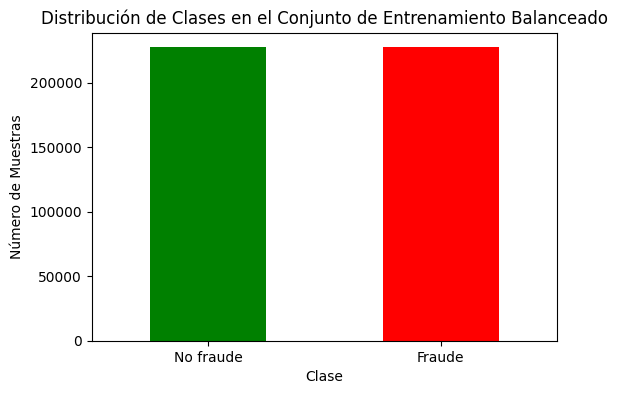

In [37]:
import matplotlib.pyplot as plt

print("Distribución de clases en y_train_balanceado:")
print(y_train_balanced.value_counts())


plt.figure(figsize=(6, 4))
y_train_balanced.value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribución de Clases en el Conjunto de Entrenamiento Balanceado')
plt.xlabel('Clase')
plt.ylabel('Número de Muestras')
plt.xticks(ticks=[0, 1], labels=['No fraude', 'Fraude'], rotation=0)
plt.show()
